<a href="https://colab.research.google.com/github/ChristianKitte/HelloClustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aufgabe EA 12 Clustering Exercise**

***(Wie immer steht die eigentliche Lösung ganz unten...)***

Die hier behandelte Einsendeaufgabe besteht darin, aus einem gegebenen und ungelabelten Dataset die optimale Größe von k zu bestimmen. Die hier gezeigte Lösung basiert auf SciKit Learn. Zur Visualisierung verwende ich Matplotlib.

---

Im ersten Schritt der hier vorgestellten Lösung werden zunächst die wichtigsten Bibliotheken geladen.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

#plt.rcParams['figure.figsize'] = (16,9)

print("Initialisierung abgeschlossen...")

Initialisierung abgeschlossen...


Die vorgegebenen Daten habe ich für die bessere Verfügbarkeit in ein eigens für die Aufgabe angelegtes Repository auf GitHub kopiert.

Mit Hilfe von Pandas lese ich die Daten aus der CSV Datei ein und erzeuge daraus ein DataFrame Objekt. Um sehr große und sehr kleine Werte auszugleichen, skaliere ich die Werte mit Hilfe eines MinMaxScalers zwischen 0 und 1. Da im folgenden nur mit diesen Daten gearbeitet wird, gebrauche ich die beim Anpassen gewonnenen Einstellungen nicht, weshalb ich sie auch nicht weiter vorhalte.

Anschließend lasse ich die Daten mit Hilfe von Matplotlib in einem 3D Scatterdiagramm ausgeben. Man erkennt deutlich fünf Cluster. Das finale Ergebnis wird somit in einer ersten Schätzung etwa bei fünf liegen.

Übersicht ausgegeben...


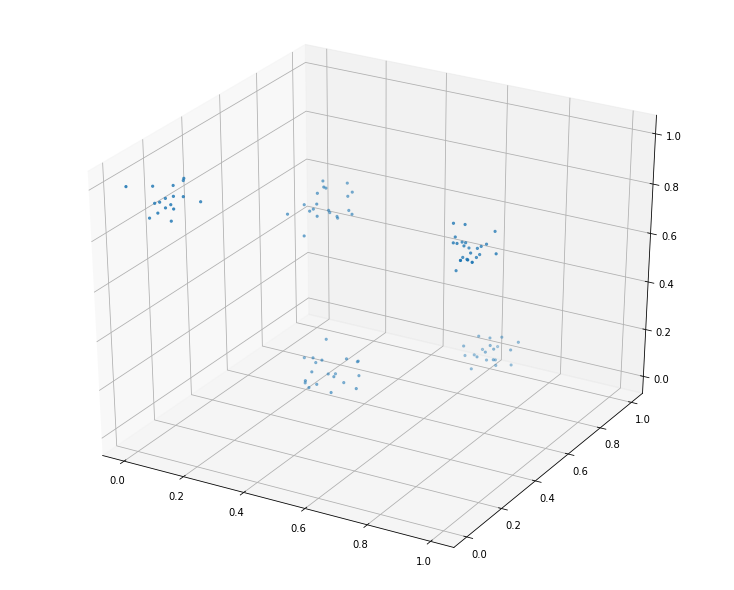

In [3]:


ds_raw=pd.read_csv("https://raw.githubusercontent.com/ChristianKitte/HelloClustering/main/edlich-kmeans-A0.csv")

#ds_raw.describe
#ds_raw.dtypes
#ds_raw

mms = MinMaxScaler()
mms.fit(ds_raw)
ds = mms.transform(ds_raw)

ds_figure=plt.figure(figsize=[10,8],)
ds_axes=Axes3D(ds_figure)
#ds_axes.scatter(ds_raw.iloc[:,0],ds_raw.iloc[:,1],ds_raw.iloc[:,2],marker=".")
ds_axes.scatter(ds[:,0],ds[:,1],ds[:,2],marker=".")

#ds.iloc[:,0].min
#print("Minimum", ds.min())
#print("Maximum", ds.max())

print("Übersicht ausgegeben...")

Um den Code übersichtlich und einfach zu halten, lege ich eine Reihe von Funktionen an.

* compute_cluster - Führt eine Clusteranalyse für das übergebene Dataset und  die übergebenen Anzahl an Clustern durch. Die Methode gibt die Koordinaten der Zentren, die zum Dataset gehörenden Labels sowie die Summer der Distanzen zurück. Letztere ist ein Maß für den Erfolg des Vorgangs und sollte möglichst klein sein. 


In [9]:
def compute_cluster(dataset,number_of_cluster):
  #Initialisierung
  kmeans=KMeans(n_clusters=number_of_cluster,)

  #Fitten/Anpassen
  kmeans.fit(dataset)
  
  #Vorhersage
  labels=kmeans.predict(dataset)

  #gefundene Cluster
  cluster_centers=kmeans.cluster_centers_
  
  # Distanz der Sample zu den naheliegensten Zentren
  # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html :
  # "Sum of squared distances of samples to their closest cluster center."
  sum_sqrt_distances= kmeans.inertia_

  print("Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster: ", number_of_cluster)

  return cluster_centers, labels, sum_sqrt_distances

print("Funktion compute_cluster wurde angelegt...")

Funktion compute_cluster wurde angelegt...


* compute_list_of_k - Führt mit dem übergebenen Dataset mehrere Clusteranalysen für eine fortlaufende Anzahl k aus. Die Anzahl wird durch Übergabe eines Start- und Endwertes (start inklusive, ende exclusive) festgelegt. Die Funktion gibt für jeden Durchlauf die Summe der Distanzen sowie die Differenz zu der vorhergehenden Distanz zurück.

In [12]:
def compute_list_of_k(dataset,start,end):
  # inspired by:
  # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
  # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  # https://en.wikipedia.org/wiki/Euclidean_distance

  sum_sqrt_distance = []
  div_sqrt_distance = []

  K = range(start,end)
  for k in K:
    _, _, distance = compute_cluster(dataset,k)
    sum_sqrt_distance.append(distance)

    if(k == start):
      div_sqrt_distance.append(distance)
    else:
      last_index = len(sum_sqrt_distance) - 2 # zero-based index!
      curr_index = len(sum_sqrt_distance) - 1 # zero-based index!
      diff_value = sum_sqrt_distance[last_index] - sum_sqrt_distance[curr_index]

      #print(sum_sqrt_distance[last_index])
      #print(sum_sqrt_distance[curr_index])
      #print(diff_value)
      
      div_sqrt_distance.append(diff_value)
  
  return sum_sqrt_distance, div_sqrt_distance

print("Funktion compute_optimum_number_k wurde angelegt...")

Funktion compute_optimum_number_k wurde angelegt...


* plot_distribution - Der Funktion werden eine Liste von Clustern (deren Koordinaten) sowie von Elementen und deren Zuordnung zu den Clustern (Labels) übergeben. Zudem kann optional eine Überschrift mitgegeben werden. Als Ergebnis wird ein Scatter Diagramm mit den Elementen und den zugehörigen Zentren ausgegeben. Die Zentren werden durchnummeriert, die Elemente farbig nach Clustern gruppiert. Die Nummern der Cluster entsprechen dem Index der übergebenen Liste von Clustern.

In [5]:
def plot_distribution(centers, elements, labels,  title = ""):
  # https://matplotlib.org/stable/gallery/userdemo/annotate_text_arrow.html#sphx-glr-gallery-userdemo-annotate-text-arrow-py
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

  ds_figure = plt.figure(figsize = [10,8])
  ds_axes = Axes3D(ds_figure)
  
  plt.title(title)

  ds_axes.scatter(elements[:,0],elements[:,1],elements[:,2], c = labels, marker = ".", )
  ds_axes.scatter(centers[:,0],centers[:,1],centers[:,2], c = "red", marker = "*", s = 100)

  center_number = 0
  for center in centers:
    ds_axes.text3D(center[0],center[1],center[2], str(center_number))
    center_number = center_number+1
  
  print("Plot der Verteilung wurde ausgegeben...")

print("Funktion plot_distribution wurde angelegt...")

Funktion plot_distribution wurde angelegt...


* do_2d_plot - Eine Funktion, um einfach ein 2D Diagramm auszugeben. Übergeben werden ein Titel, der Name und die Werte für die X-Achse sowie der Name und die Werte für die Y-Achse. Als Ergebnis wird das so definierte Diagramm ausgegeben.

In [6]:
def do_2d_plot(title, x_name, x_values, y_name, y_values):
  plt.plot(x_values, y_values, color="green", marker="o")
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(title)
  plt.show()

print("Funktion do_2d_plot wurde angelegt...")

Funktion do_2d_plot wurde angelegt...


Nach dem Anlegen der zuvor beschriebenen Methoden wird in dieser Zelle mit der Lösung der Aufgabenstellung begonnen.

Wie zuvor im ersten Diagramm der Daten zu erkennen war, wird die gesuchte Zahl der Cluster etwa bei fünf liegen. Zum Zwecke der Demonstration und auch da der Datensatz recht klein ist, wird hier ein Bereich von 1 bis 20 zum Testen genommen.

Am Ende des Durchlaufs werden die Werte der Distanzen sowie der Differenzen, wie oben beschrieben, ausgegeben.

Weiter werden Diagramm ausgegeben, um die Werte zu visualisieren und so den elbow effect zu verdeutlichen.

Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  1
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  2
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  3
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  4
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  5
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  6
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  7
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  8
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  9
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  10
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  11
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  12
Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  13
Klassifizierer traini

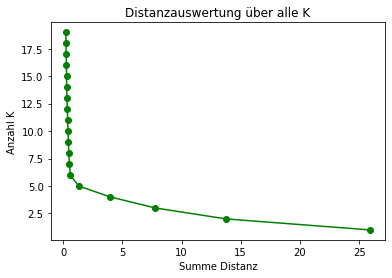

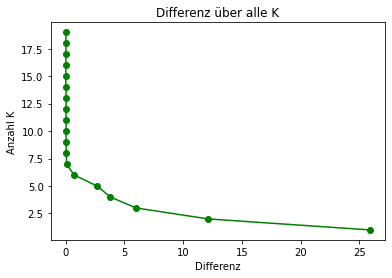

Fertig...


In [14]:
sum_sqrt_distance, div_sqrt_distance = compute_list_of_k(ds,1,20)
print(sum_sqrt_distance)
print(div_sqrt_distance)

do_2d_plot("Distanzauswertung über alle K", "Summe Distanz", sum_sqrt_distance, "Anzahl K", range(1,20))
do_2d_plot("Differenz über alle K", "Differenz", div_sqrt_distance, "Anzahl K", range(1,20))

#centers, labels=compute_cluster(ds,11)
#plot_distribution(centers,ds,labels)

#print(labels)

print("Fertig...")

Aufgabe der letzen Zelle ist die finale Clusteranalyse mit den gewählten k sowie die Ausgabe des Clustervectors und einer visuellen Darstellung der Situation mit Hilfe eines Scatterdiagramms.

Hierfür wird einmal k=5 gewählt, was mit Blick auf die offensichtlichen "Wolken" anfänglich als eine Möglichkeit gesehen wurde.

Betrachtet man jedoch die Ergebnisse von oben, so erkennt man bei den Differenzen neben der im Trend kontinuierlichen Abnahme ab einer bestimmten Anzahl von k nur noch sehr kleine Unterschiede < 0,1.

Wird diese Grenzsituation genauer betrachtet, so sieht man:

4. ...
5. k=5 ==> 2.6779221307258165 
6. k=6 ==> 0.7112312148187727 
7. k=7 ==> 0.07370776291765058
8. ...

Bis k=5 ergeben sich je hinzugefügten Cluster große Differenzen. Für k=5 findet sich in jeder "Wolke" ein Zentrum. Bei einer Erhöhung von k auf 6 und dann auf 7 erfolgt jeweils nochmals ein zumindest merklicher Sprung, anschließend ergeben sich nur noch wie oben angegeben Differenzen < 0,1.

Zusammenfassen ist allein auf Grund der Zahlen somit zu sagen, dass eine Clusterung bis k=7 zu einer merklichen Steigerung führt. Darüber hinaus erfolgt kein relevanter Zugewinn. 

Eine Verbindung der Daten mit deren Kontext kann natürlich auch dazu führen, dass man letztlich doch zu der Ansicht kommt, dass k=5 ausreichend ist.

Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  5
Plot der Verteilung wurde ausgegeben...

Klassifizierer trainiert und Vorhersage durchgeführt... Anzahl Cluster:  7
Plot der Verteilung wurde ausgegeben...

Clustervektor für k = 5:
[4 2 2 0 2 1 0 2 3 0 2 3 0 1 4 2 3 1 4 4 2 3 4 2 2 0 3 3 3 1 3 3 1 1 2 4 1
 4 3 2 1 1 1 4 1 2 0 0 1 0 0 1 3 3 0 0 4 0 2 1 0 4 0 0 1 0 4 4 4 1 1 0 3 0
 0 3 2 1 0 3 3 1 2 4 4 2 4 4 4 0 3 3 3 2 0 0 3 1 4 4]

Clustervektor für k = 7:
[6 3 3 1 3 4 1 3 2 1 3 2 1 4 6 3 2 4 0 6 3 2 0 3 3 5 2 2 2 4 2 2 4 4 3 0 4
 0 2 3 4 4 4 0 4 3 1 1 4 1 1 4 2 2 1 1 0 1 3 4 1 6 5 1 4 1 0 0 6 4 4 1 2 1
 1 2 3 4 1 2 2 4 3 0 6 3 6 0 6 1 2 2 2 3 5 1 2 4 0 6]

Fertig...


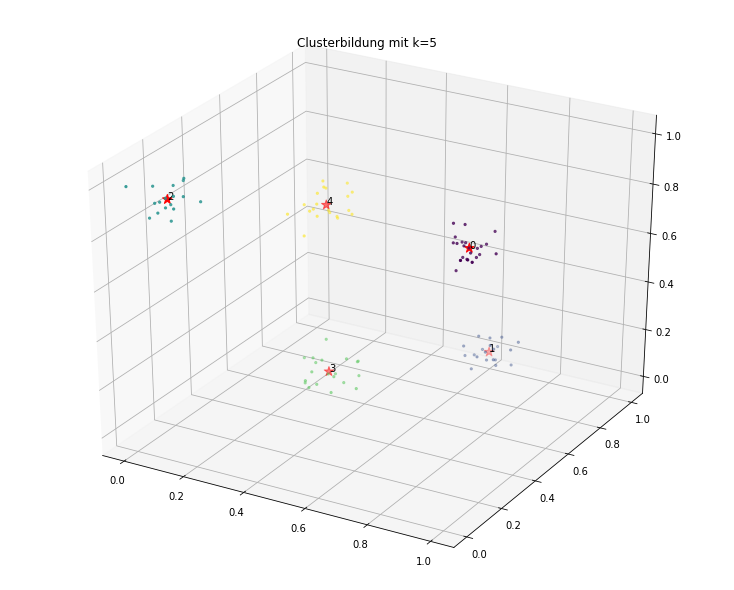

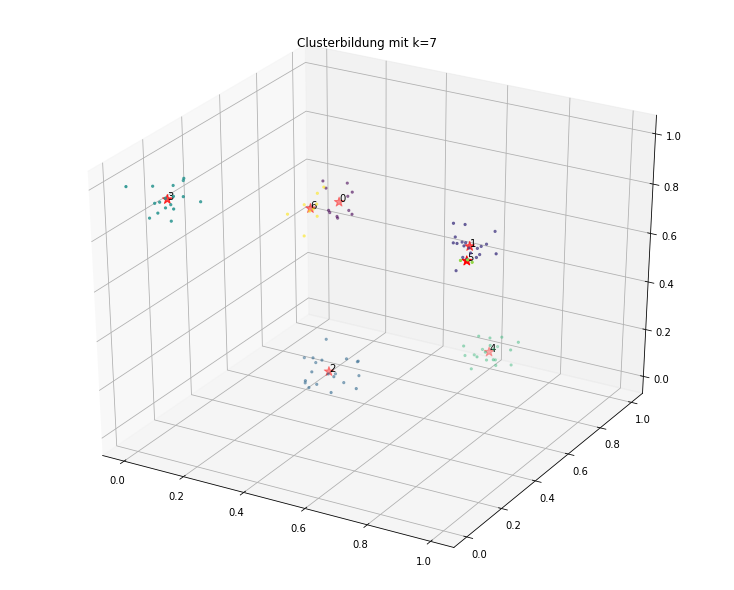

In [16]:
cluster_centers, labels, sum_sqrt_distances = compute_cluster(ds,5)
plot_distribution(cluster_centers, ds, labels, "Clusterbildung mit k=5")

print("")
cluster_centers_2, labels_2, sum_sqrt_distances_2 = compute_cluster(ds,7)
plot_distribution(cluster_centers_2, ds, labels_2, "Clusterbildung mit k=7")

print("")
print("Clustervektor für k = 5:")
print(labels)

print("")
print("Clustervektor für k = 7:")
print(labels_2)

print("")
print("Fertig...")